# **Import Librarys**

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **Load Dataset**

In [14]:
# Load the dataset
repurchase_df = pd.read_csv("/content/repurchase_dataset.csv")

# **Data Preprocessing**

In [15]:
# Handling missing values
repurchase_df.fillna(0, inplace=True)

# Convert categorical features to strings
categorical_cols = repurchase_df.select_dtypes(include=['object']).columns
repurchase_df[categorical_cols] = repurchase_df[categorical_cols].astype(str)

# Splitting features and target variable
X = repurchase_df.drop(['Target', 'ID'], axis=1)  # Features
y = repurchase_df['Target']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline for numerical and categorical variables
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Full preprocessing pipeline
preprocessed_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Preprocess the training data
X_train_preprocessed = preprocessed_pipeline.fit_transform(X_train)

# Preprocess the testing data
X_test_preprocessed = preprocessed_pipeline.transform(X_test)


# **Summary statistics**

In [16]:
# Display basic information about the dataset
print(repurchase_df.info())

# Summary statistics for numerical variables
print(repurchase_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         131337 non-null  int64 
 1   Target                     131337 non-null  int64 
 2   age_band                   131337 non-null  object
 3   gender                     131337 non-null  object
 4   car_model                  131337 non-null  object
 5   car_segment                131337 non-null  object
 6   age_of_vehicle_years       131337 non-null  int64 
 7   sched_serv_warr            131337 non-null  int64 
 8   non_sched_serv_warr        131337 non-null  int64 
 9   sched_serv_paid            131337 non-null  int64 
 10  non_sched_serv_paid        131337 non-null  int64 
 11  total_paid_services        131337 non-null  int64 
 12  total_services             131337 non-null  int64 
 13  mth_since_last_serv        131337 non-null  

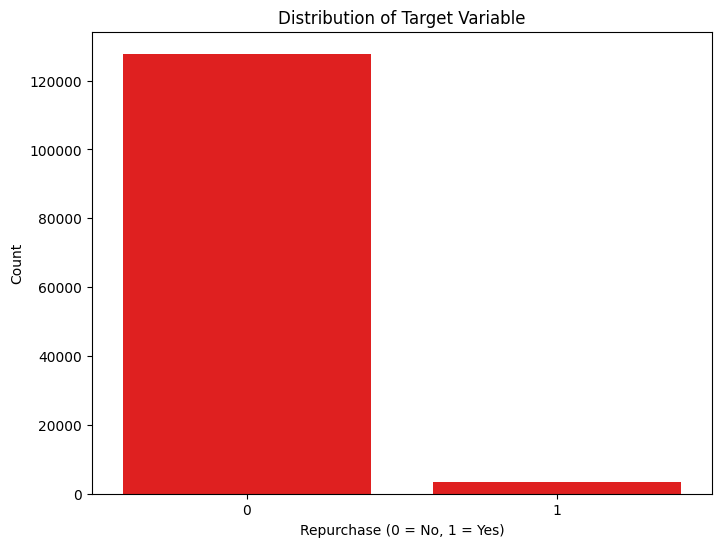

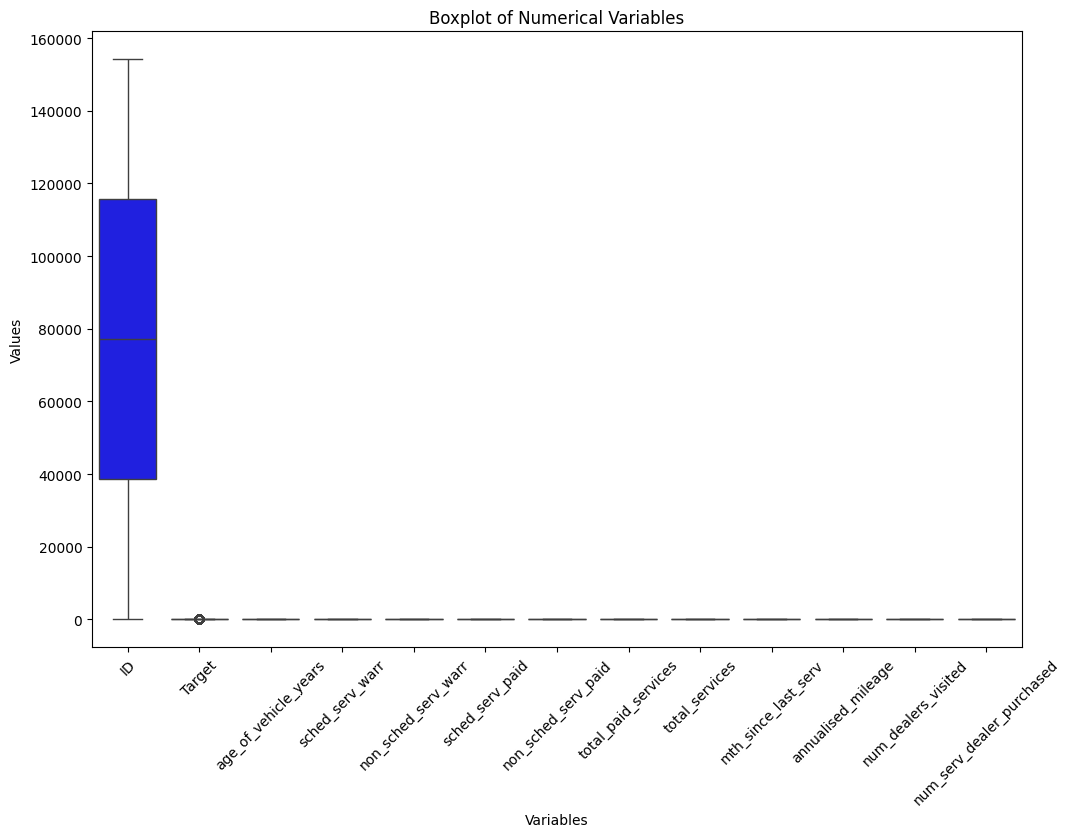

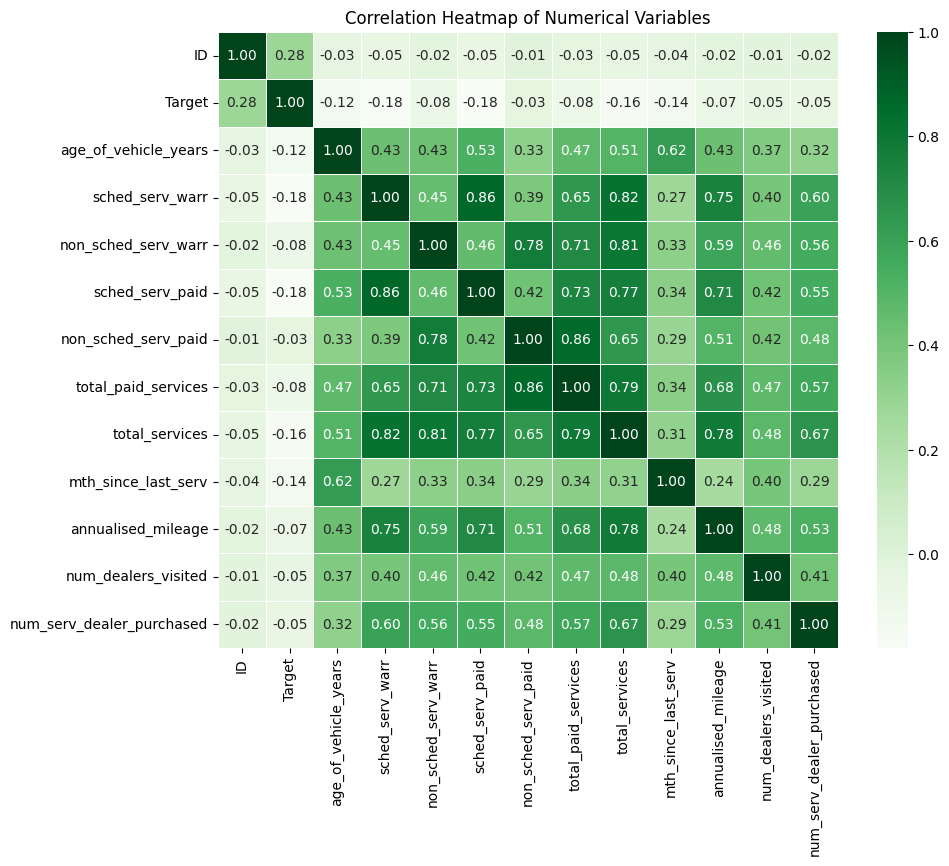

In [17]:
# Distribution of target variable with red color
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=repurchase_df, color='red')
plt.title('Distribution of Target Variable')
plt.xlabel('Repurchase (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Check if 'service_ratio' column exists before dropping
if 'service_ratio' in repurchase_df.columns:
    repurchase_df.drop('service_ratio', axis=1, inplace=True)

# Boxplot to identify outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=repurchase_df, color='blue')
plt.title('Boxplot of Numerical Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

# Define numerical_cols based on the columns of repurchase_df that are numerical
numerical_cols = repurchase_df.select_dtypes(include=['float64', 'int64']).columns

# Check if 'service_ratio' column exists before generating the correlation heatmap
if 'service_ratio' in numerical_cols:
    numerical_cols = numerical_cols.drop('service_ratio')

# Correlation heatmap for numerical variables with green color
plt.figure(figsize=(10, 8))
sns.heatmap(repurchase_df[numerical_cols].corr(), annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()



# **Random Forest Classifier**

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25608
           1       1.00      1.00      1.00       660

    accuracy                           1.00     26268
   macro avg       1.00      1.00      1.00     26268
weighted avg       1.00      1.00      1.00     26268

Confusion Matrix:
[[25608     0]
 [    0   660]]


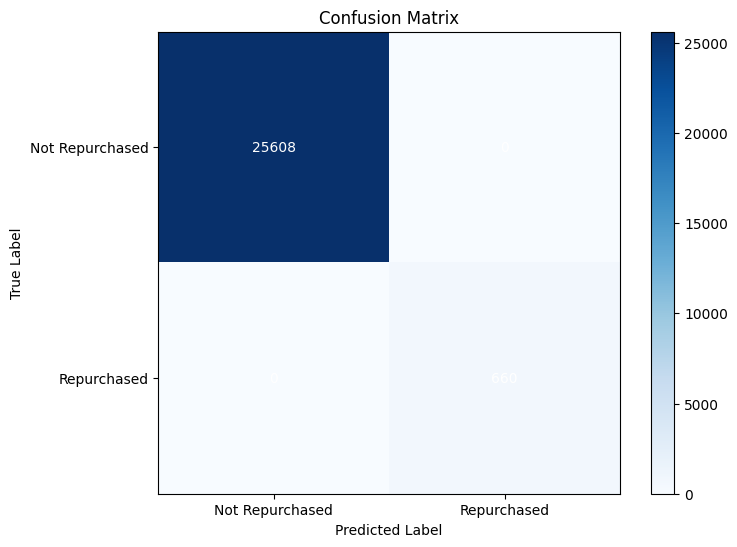

In [18]:
# Assuming 'Target' is the target variable and other columns are features
X = repurchase_df.drop(columns=['Target'])
y = repurchase_df['Target']

# Perform one-hot encoding for categorical variables
X = pd.get_dummies(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(2), labels=['Not Repurchased', 'Repurchased'])
plt.yticks(np.arange(2), labels=['Not Repurchased', 'Repurchased'])
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='white')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
